<img src = "https://global-uploads.webflow.com/5f0d53c042a9ed6288de7f8d/5f6337ae2cfaa10946ceeb06_Hacktiv8%20logo%20horizontal%2001%20black-p-500.png" width = 400 >
<h1 align=center><font size = 5>Hacktiv8 Intermediate Python for Data Science</font></h1>

<h1 align=center><font size = 5>Final Project</font></h1>

klasifikasi Job Family berdasarkan data deskripsi dan judul course di Telkom CorpU. Data yang digunakan adalah 11072 data course yang telah memiliki label Job Family, yang terdiri dari 5 kelas.

# Import Data & Library

In [1]:
from tensorflow.python.keras import models, layers, optimizers
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer, text_to_word_sequence
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("dataset/20210122-Kampiun Digilib Clean-jfam-jfunc.csv",encoding='latin-1')
df.head(5)

,source,org_id,doc_id,doc_title,doc_description,Job Family,Job Function,job_role,job_role_clean
0,Kampiun,NaN,27243,Case Study 1 tahun Magang di Kementerian BUMN,NaN,BUSINESS ENABLER/ENTERPRISE MGT,Human Capital,5.2.3 Learning &amp; Development,Learning & Development
1,Kampiun,NaN,29134,Case Study 1 tahun Magang di Kementerian BUMN,NaN,BUSINESS ENABLER/ENTERPRISE MGT,Human Capital,5.2.3 Learning &amp; Development,Learning & Development
2,Kampiun,NaN,28690,ILC : Securing Revenue Witel Riau Daratan 2017,NaN,STRATEGIC PLAN & DEVELOPMENT,Strategic Planning,2.1.1 Internal &amp; External Analysis,Internal & External Analysis
3,Kampiun,NaN,33756,SIKAT HABIS FTTH UNSPEC DENGAN MINI OLT OUTDOOR,NaN,DIGITAL & ICT,Telecommunication,1.1.6 Access Network O&amp;M,Access Network Operation & Maintenance
4,Kampiun,NaN,38567,PROSES PENGAJUAN CAPEX FTTH INDIHOME DI WITEL NTB,NaN,DIGITAL & ICT,Telecommunication,1.1.2 Access Network Design &amp; Planning,Access Network Design & Planning


# Preprocessing & EDA

In [6]:
df['title_desc'] = df['doc_title'].fillna('')+" "+df['doc_description'].fillna('')

In [7]:
df.drop([
    'source', 'org_id', 'doc_id', 'job_role','job_role_clean'
], axis=1, inplace=True)
df

,doc_title,doc_description,Job Family,Job Function,title_desc
0,Case Study 1 tahun Magang di Kementerian BUMN,NaN,BUSINESS ENABLER/ENTERPRISE MGT,Human Capital,Case Study 1 tahun Magang di Kementerian BUMN
1,Case Study 1 tahun Magang di Kementerian BUMN,NaN,BUSINESS ENABLER/ENTERPRISE MGT,Human Capital,Case Study 1 tahun Magang di Kementerian BUMN
2,ILC : Securing Revenue Witel Riau Daratan 2017,NaN,STRATEGIC PLAN & DEVELOPMENT,Strategic Planning,ILC : Securing Revenue Witel Riau Daratan 2017
3,SIKAT HABIS FTTH UNSPEC DENGAN MINI OLT OUTDOOR,NaN,DIGITAL & ICT,Telecommunication,SIKAT HABIS FTTH UNSPEC DENGAN MINI OLT OUTDOOR
4,PROSES PENGAJUAN CAPEX FTTH INDIHOME DI WITEL NTB,NaN,DIGITAL & ICT,Telecommunication,PROSES PENGAJUAN CAPEX FTTH INDIHOME DI WITEL ...
...,...,...,...,...,...
11296,PENTINGNYA LOYALITAS PELANGGAN,Ditengah-tengah persaingan berbagai bisnis/ind...,COMMERCE & RELATION,Sales,PENTINGNYA LOYALITAS PELANGGAN Ditengah-tengah...
11297,Uji Terima Online dalam Proyek Digitalisasi SP...,1. Latar Belakang \n ...,DIGITAL & ICT,Information Technology,Uji Terima Online dalam Proyek Digitalisasi SP...
11298,REKON TAGIHAN PSB TA TO TELKOM WITEL PURWOKERTO,CARA REKON TAGIHAN PSB TA KE TELKOM \n \n1. A...,BUSINESS ENABLER/ENTERPRISE MGT,Education,REKON TAGIHAN PSB TA TO TELKOM WITEL PURWOKE...
11299,TDSCC (Telkom DIGITAL SOLUTION CARE CENTER) G...,#NAME?,DIGITAL & ICT,Information Technology,TDSCC (Telkom DIGITAL SOLUTION CARE CENTER) G...


In [8]:
import re
def preprocess(text):
    
    text = str(text).lower()
    text = re.sub(r'^<div id="video.*>&nbsp;', '', text) # Video-review part
    text = re.sub('https?://[A-Za-z0-9./]+', '', text) # URLs
    
    # Remove HTML Tag
    text = re.sub('<.*?>', '', text)    
    
    # Remove everything in bracket    
    text = re.sub('\[[^)]*\]', '', text)    
    
    text = re.sub('[/]+', ' ', text) # word1/word2 to word1 word2
    # Remove non-alphanumeric characters (but not - and _, might be useful for tokenization)
    text = re.sub('[^A-Za-z0-9-_ ]+', '', text)

    # Remove words that are digits only
    text = re.sub('\b\d+\b', '', text)                
    
    return text

In [9]:
df['title_desc'] = df['title_desc'].apply(preprocess)

In [10]:
df.head(5)

,doc_title,doc_description,Job Family,Job Function,title_desc
0,Case Study 1 tahun Magang di Kementerian BUMN,NaN,BUSINESS ENABLER/ENTERPRISE MGT,Human Capital,case study 1 tahun magang di kementerian bumn
1,Case Study 1 tahun Magang di Kementerian BUMN,NaN,BUSINESS ENABLER/ENTERPRISE MGT,Human Capital,case study 1 tahun magang di kementerian bumn
2,ILC : Securing Revenue Witel Riau Daratan 2017,NaN,STRATEGIC PLAN & DEVELOPMENT,Strategic Planning,ilc securing revenue witel riau daratan 2017
3,SIKAT HABIS FTTH UNSPEC DENGAN MINI OLT OUTDOOR,NaN,DIGITAL & ICT,Telecommunication,sikat habis ftth unspec dengan mini olt outdoor
4,PROSES PENGAJUAN CAPEX FTTH INDIHOME DI WITEL NTB,NaN,DIGITAL & ICT,Telecommunication,proses pengajuan capex ftth indihome di witel ...


## Stopwords

In [24]:
from IPython.display import display, clear_output
import time
from nltk.corpus import stopwords
from nltk.corpus import wordnet as wn
from nltk.tokenize import word_tokenize

len_df = len(df)
start = 0
# end   = 960205
t1 = time.time()
for entry in df['title_desc']:    
    clear_output(wait=True)
    res = [word for word in word_tokenize(entry) if not word in stopwords.words('english') and not word in stopwords.words('indonesian')]
    res = (" ").join(res)  
    p = (start/len_df)*100
    display("%.7f" % p +" - "+str(start))
    df.loc[start,'clean_title_desc'] = res
    if start >= len_df:
        break
    start = start+1
    
t2 = time.time()
print('Duration: {0:.2f}s'.format(round(t2-t1,2)))

'99.9911512 - 11300'

Duration: 1008.54s


In [25]:
df.head(5)

,doc_title,doc_description,Job Family,Job Function,title_desc,clean_title_desc
0,Case Study 1 tahun Magang di Kementerian BUMN,NaN,BUSINESS ENABLER/ENTERPRISE MGT,Human Capital,case study 1 tahun magang di kementerian bumn,case study 1 magang kementerian bumn
1,Case Study 1 tahun Magang di Kementerian BUMN,NaN,BUSINESS ENABLER/ENTERPRISE MGT,Human Capital,case study 1 tahun magang di kementerian bumn,case study 1 magang kementerian bumn
2,ILC : Securing Revenue Witel Riau Daratan 2017,NaN,STRATEGIC PLAN & DEVELOPMENT,Strategic Planning,ilc securing revenue witel riau daratan 2017,ilc securing revenue witel riau daratan 2017
3,SIKAT HABIS FTTH UNSPEC DENGAN MINI OLT OUTDOOR,NaN,DIGITAL & ICT,Telecommunication,sikat habis ftth unspec dengan mini olt outdoor,sikat habis ftth unspec mini olt outdoor
4,PROSES PENGAJUAN CAPEX FTTH INDIHOME DI WITEL NTB,NaN,DIGITAL & ICT,Telecommunication,proses pengajuan capex ftth indihome di witel ...,proses pengajuan capex ftth indihome witel ntb


## Save & Reload Preprocessed Data

In [27]:
# Save preprocessed data to load further
# df.to_csv('dataset/[PREPROCESSED]20210122-Kampiun Digilib Clean-jfam-jfunc.csv')

In [2]:
# Reload Preprocess Data
df = pd.read_csv('dataset/[PREPROCESSED]20210122-Kampiun Digilib Clean-jfam-jfunc.csv', index_col=0)

In [3]:
df.isna().sum()

doc_title            18
doc_description     241
Job Family            0
Job Function          0
title_desc            0
clean_title_desc      0
dtype: int64

In [4]:
df['Job Family'].value_counts()

DIGITAL & ICT                      3817
COMMERCE & RELATION                2880
BUSINESS ENABLER/ENTERPRISE MGT    2206
STRATEGIC PLAN & DEVELOPMENT       2169
RISK & COMPLIANCE                   229
Name: Job Family, dtype: int64

<AxesSubplot:>

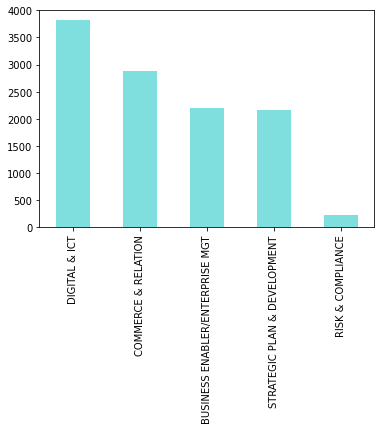

In [5]:
df['Job Family'].value_counts().plot(
                        kind='bar',
                        alpha=0.5,                         
                        color='c'
                        )

#### Drop Job Family Risk & Compliance because of data imbalance

In [6]:
df[df['Job Family'] != 'RISK & COMPLIANCE']

,doc_title,doc_description,Job Family,Job Function,title_desc,clean_title_desc
0,Case Study 1 tahun Magang di Kementerian BUMN,NaN,BUSINESS ENABLER/ENTERPRISE MGT,Human Capital,case study 1 tahun magang di kementerian bumn,case study 1 magang kementerian bumn
1,Case Study 1 tahun Magang di Kementerian BUMN,NaN,BUSINESS ENABLER/ENTERPRISE MGT,Human Capital,case study 1 tahun magang di kementerian bumn,case study 1 magang kementerian bumn
2,ILC : Securing Revenue Witel Riau Daratan 2017,NaN,STRATEGIC PLAN & DEVELOPMENT,Strategic Planning,ilc securing revenue witel riau daratan 2017,ilc securing revenue witel riau daratan 2017
3,SIKAT HABIS FTTH UNSPEC DENGAN MINI OLT OUTDOOR,NaN,DIGITAL & ICT,Telecommunication,sikat habis ftth unspec dengan mini olt outdoor,sikat habis ftth unspec mini olt outdoor
4,PROSES PENGAJUAN CAPEX FTTH INDIHOME DI WITEL NTB,NaN,DIGITAL & ICT,Telecommunication,proses pengajuan capex ftth indihome di witel ...,proses pengajuan capex ftth indihome witel ntb
...,...,...,...,...,...,...
11296,PENTINGNYA LOYALITAS PELANGGAN,Ditengah-tengah persaingan berbagai bisnis/ind...,COMMERCE & RELATION,Sales,pentingnya loyalitas pelanggan ditengah-tengah...,loyalitas pelanggan ditengah-tengah persaingan...
11297,Uji Terima Online dalam Proyek Digitalisasi SP...,1. Latar Belakang \n ...,DIGITAL & ICT,Information Technology,uji terima online dalam proyek digitalisasi sp...,uji terima online proyek digitalisasi spbu sol...
11298,REKON TAGIHAN PSB TA TO TELKOM WITEL PURWOKERTO,CARA REKON TAGIHAN PSB TA KE TELKOM \n \n1. A...,BUSINESS ENABLER/ENTERPRISE MGT,Education,rekon tagihan psb ta to telkom witel purwoke...,rekon tagihan psb ta telkom witel purwokerto r...
11299,TDSCC (Telkom DIGITAL SOLUTION CARE CENTER) G...,#NAME?,DIGITAL & ICT,Information Technology,tdscc telkom digital solution care center go ...,tdscc telkom digital solution care center go o...


In [7]:
df.drop(df[df['Job Family'] == 'RISK & COMPLIANCE'].index, inplace = True)

In [8]:
df

,doc_title,doc_description,Job Family,Job Function,title_desc,clean_title_desc
0,Case Study 1 tahun Magang di Kementerian BUMN,NaN,BUSINESS ENABLER/ENTERPRISE MGT,Human Capital,case study 1 tahun magang di kementerian bumn,case study 1 magang kementerian bumn
1,Case Study 1 tahun Magang di Kementerian BUMN,NaN,BUSINESS ENABLER/ENTERPRISE MGT,Human Capital,case study 1 tahun magang di kementerian bumn,case study 1 magang kementerian bumn
2,ILC : Securing Revenue Witel Riau Daratan 2017,NaN,STRATEGIC PLAN & DEVELOPMENT,Strategic Planning,ilc securing revenue witel riau daratan 2017,ilc securing revenue witel riau daratan 2017
3,SIKAT HABIS FTTH UNSPEC DENGAN MINI OLT OUTDOOR,NaN,DIGITAL & ICT,Telecommunication,sikat habis ftth unspec dengan mini olt outdoor,sikat habis ftth unspec mini olt outdoor
4,PROSES PENGAJUAN CAPEX FTTH INDIHOME DI WITEL NTB,NaN,DIGITAL & ICT,Telecommunication,proses pengajuan capex ftth indihome di witel ...,proses pengajuan capex ftth indihome witel ntb
...,...,...,...,...,...,...
11296,PENTINGNYA LOYALITAS PELANGGAN,Ditengah-tengah persaingan berbagai bisnis/ind...,COMMERCE & RELATION,Sales,pentingnya loyalitas pelanggan ditengah-tengah...,loyalitas pelanggan ditengah-tengah persaingan...
11297,Uji Terima Online dalam Proyek Digitalisasi SP...,1. Latar Belakang \n ...,DIGITAL & ICT,Information Technology,uji terima online dalam proyek digitalisasi sp...,uji terima online proyek digitalisasi spbu sol...
11298,REKON TAGIHAN PSB TA TO TELKOM WITEL PURWOKERTO,CARA REKON TAGIHAN PSB TA KE TELKOM \n \n1. A...,BUSINESS ENABLER/ENTERPRISE MGT,Education,rekon tagihan psb ta to telkom witel purwoke...,rekon tagihan psb ta telkom witel purwokerto r...
11299,TDSCC (Telkom DIGITAL SOLUTION CARE CENTER) G...,#NAME?,DIGITAL & ICT,Information Technology,tdscc telkom digital solution care center go ...,tdscc telkom digital solution care center go o...


In [9]:
df.groupby('Job Family').size()/df.shape[0]

Job Family
BUSINESS ENABLER/ENTERPRISE MGT    0.199241
COMMERCE & RELATION                0.260116
DIGITAL & ICT                      0.344743
STRATEGIC PLAN & DEVELOPMENT       0.195900
dtype: float64

In [10]:
df['Job Family'].value_counts()

DIGITAL & ICT                      3817
COMMERCE & RELATION                2880
BUSINESS ENABLER/ENTERPRISE MGT    2206
STRATEGIC PLAN & DEVELOPMENT       2169
Name: Job Family, dtype: int64

<AxesSubplot:>

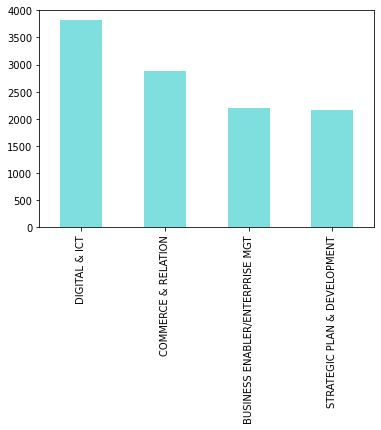

In [12]:
df['Job Family'].value_counts().plot(
                        kind='bar',
                        alpha=0.5,                         
                        color='c'
                        )

### Alt 1: Balance Class

In [114]:
# # Balance Class
# sample_size = 2169 # needs to be less than the number of observations in the minority class
# sample_df = df.groupby('Job Family').apply(lambda x: x.sample(sample_size))

In [115]:
# sample_df = sample_df.reset_index(level=0, drop=True)

In [116]:
# sample_df = sample_df.sort_index()

### Alt 2: Unbalance Class

In [13]:
# Unbalance Class
sample_df = df

In [14]:
sample_df.groupby("Job Family").size()

Job Family
BUSINESS ENABLER/ENTERPRISE MGT    2206
COMMERCE & RELATION                2880
DIGITAL & ICT                      3817
STRATEGIC PLAN & DEVELOPMENT       2169
dtype: int64

In [15]:
sample_df['word_count'] = sample_df['clean_title_desc'].str.split().str.len()

In [16]:
# sample_df.head(5)
sample_df[sample_df['word_count']<=4]

,doc_title,doc_description,Job Family,Job Function,title_desc,clean_title_desc,word_count
133,INSIDEN,INSIDEN jika tidak dilaorkan akan menjadi keru...,BUSINESS ENABLER/ENTERPRISE MGT,Education,insiden insiden jika tidak dilaorkan akan menj...,insiden insiden dilaorkan kerugian,4


In [17]:
result = [x for x in sample_df['word_count']]
print("Mean : {}".format(np.mean(result)))
print("Max  : {}".format(sample_df['word_count'].max()))
print("Min  : {}".format(sample_df['word_count'].min()))

Mean : 72.65128251445087
Max  : 1478
Min  : 4


In [18]:
sample_df.clean_title_desc[:3].values

array(['case study 1 magang kementerian bumn',
       'case study 1 magang kementerian bumn',
       'ilc securing revenue witel riau daratan 2017'], dtype=object)

In [19]:
X = sample_df.clean_title_desc.values
y = sample_df['Job Family'].values

In [20]:
X[:3]

array(['case study 1 magang kementerian bumn',
       'case study 1 magang kementerian bumn',
       'ilc securing revenue witel riau daratan 2017'], dtype=object)

## Train Test Split

In [21]:
from sklearn.model_selection import train_test_split

X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, random_state=22, test_size=0.1)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=22, test_size=0.1)

In [24]:
print(X_train[144])
print(y_test[144])

telkomsel revenue double digit pengertian resiliansi base stasion telkomsel dual homing infrastruktur jaringan network acces jaringan optik sto berbeda masing- acces jalur optik berbeda sto berpengaruh jaringan optik putus disisi jaringan sto layanan jalansaat telkom jawa barat gencar melaksanakan pemasangan dual homing jaringan telkomsel kebijakan direksi ldquomengutamakan utamardquo telkomsel telepon seluler berbasis gsm harapan andalan perusahaan menjanjikan perhatian tercapainya target telkomsel revenue double digit menggembirakan harapan tanggung meningkatkan kwalitas layanan memuaskan penggunanya revenue dipertahankan meningkatpermasalahan penanggulangan gangguan bts node-b telkomsel dibawah tolok ukur sla service level agreement disepakati telkom telkomsel 3 jam 10 jam berhari-hari mean time recovery mttr dicapai 12 januari 2017 10 februari 2017 data mttr node-b telkomsel jawa barat perangkat access metro-e ont-gpon direct core metro-edengan penanggulangan gangguan loss opportun

In [23]:
# Convert all word to string
X_train = [str (item) for item in X_train]
X_valid = [str (item) for item in X_valid]
X_test = [str (item) for item in X_test]

## Tokenize Words

In [25]:
from tensorflow.keras.preprocessing.text import Tokenizer, text_to_word_sequence

MAX_FEATURES = 500
tokenizer = Tokenizer(num_words=MAX_FEATURES)
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_valid = tokenizer.texts_to_sequences(X_valid)
X_test = tokenizer.texts_to_sequences(X_test)

In [26]:
print(X_train[144])

[131, 26, 131, 120, 18, 64, 18, 115, 78, 301, 115, 301, 78, 18, 115, 18, 78, 3, 1, 297, 430, 18, 131, 273, 131, 304, 96, 5, 35, 131, 26, 19, 3, 26, 32, 336, 317, 131, 23, 290, 1, 131, 57, 408, 324, 408, 227, 162, 324, 162, 7, 336, 317, 131, 297, 41, 204, 378, 147, 341, 450, 337, 378, 32]


In [27]:
tokenizer.word_index['telkomsel']

131

In [28]:
# reverse index to word
reverse_word_index = dict([(value, key) for (key, value) in tokenizer.word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '') for i in text])

In [29]:
decode_review(X_train[144])

'telkomsel revenue telkomsel infrastruktur jaringan network jaringan optik sto berbeda optik berbeda sto jaringan optik jaringan sto layanan telkom barat melaksanakan jaringan telkomsel kebijakan telkomsel telepon berbasis perusahaan target telkomsel revenue meningkatkan layanan revenue gangguan node b telkomsel service level telkom telkomsel 3 jam 10 jam time 2017 10 2017 data node b telkomsel barat perangkat access metro e ont gpon core metro gangguan'

In [30]:
from sklearn.preprocessing import LabelEncoder

# Encode Label
Encoder = LabelEncoder()
y_train = Encoder.fit_transform(y_train)
y_valid = Encoder.fit_transform(y_valid)
y_test = Encoder.fit_transform(y_test)

In [31]:
# len(y_train)
y_train

array([3, 3, 3, ..., 2, 3, 3])

## Padding

In [32]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

MAX_LENGTH = max(len(X_train) for X_train in X_train)
X_train = pad_sequences(X_train, maxlen=MAX_LENGTH)
X_valid = pad_sequences(X_valid, maxlen=MAX_LENGTH)
X_test = pad_sequences(X_test, maxlen=MAX_LENGTH)

In [33]:
MAX_LENGTH

454

In [34]:
print(X_train[1])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   

In [35]:
y_train[98]

1

## Build Model 1  - Binary Crossentropy

In [1]:
model = tf.keras.models.Sequential()

model.add(
    tf.keras.layers.Embedding(
        input_dim = MAX_FEATURES,
        output_dim = 32,
        input_length = MAX_LENGTH
    )
)

model.add(
    tf.keras.layers.Dropout(
        rate=0.25
    )
)

model.add(
    tf.keras.layers.LSTM(
        units=32
    )
)

model.add(
    tf.keras.layers.Dropout(
        rate=0.25
    )
)

model.add(
    tf.keras.layers.Dense(
        units=1,
        activation='sigmoid'
    )
)

NameError: name 'tf' is not defined

In [37]:
model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 454, 32)           16000     
_________________________________________________________________
dropout (Dropout)            (None, 454, 32)           0         
_________________________________________________________________
lstm (LSTM)                  (None, 32)                8320      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 24,353
Trainable params: 24,353
Non-trainable params: 0
_________________________________________________________________


In [38]:
history = model.fit(X_train, y_train, batch_size=256, epochs=150, validation_data=(X_valid, y_valid))

Epoch 1/150
36/36 [==============================] - 23s 169ms/step - loss: 0.2178 - accuracy: 0.2611 - val_loss: -2.7607 - val_accuracy: 0.2678
Epoch 2/150
36/36 [==============================] - 4s 117ms/step - loss: -3.1537 - accuracy: 0.2597 - val_loss: -4.5762 - val_accuracy: 0.2678
Epoch 3/150
36/36 [==============================] - 4s 118ms/step - loss: -4.6204 - accuracy: 0.2616 - val_loss: -5.6643 - val_accuracy: 0.2678
Epoch 4/150
36/36 [==============================] - 4s 117ms/step - loss: -5.7495 - accuracy: 0.2618 - val_loss: -6.5423 - val_accuracy: 0.2678
Epoch 5/150
36/36 [==============================] - 4s 117ms/step - loss: -6.4401 - accuracy: 0.2623 - val_loss: -7.3337 - val_accuracy: 0.2678
Epoch 6/150
36/36 [==============================] - 4s 119ms/step - loss: -7.2274 - accuracy: 0.2637 - val_loss: -8.1047 - val_accuracy: 0.2678
Epoch 7/150
36/36 [==============================] - 4s 121ms/step - loss: -7.9786 - accuracy: 0.2652 - val_loss: -8.8348 - val_ac

36/36 [==============================] - 4s 119ms/step - loss: -91.1375 - accuracy: 0.3170 - val_loss: -82.0719 - val_accuracy: 0.2989
Epoch 112/150
36/36 [==============================] - 4s 119ms/step - loss: -91.0744 - accuracy: 0.3215 - val_loss: -82.3311 - val_accuracy: 0.3009
Epoch 113/150
36/36 [==============================] - 4s 118ms/step - loss: -93.3594 - accuracy: 0.3167 - val_loss: -82.7739 - val_accuracy: 0.2959
Epoch 114/150
36/36 [==============================] - 4s 119ms/step - loss: -92.4240 - accuracy: 0.3225 - val_loss: -83.9201 - val_accuracy: 0.2959
Epoch 115/150
36/36 [==============================] - 4s 120ms/step - loss: -93.2958 - accuracy: 0.3184 - val_loss: -84.4980 - val_accuracy: 0.2989
Epoch 116/150
36/36 [==============================] - 4s 119ms/step - loss: -96.0958 - accuracy: 0.3145 - val_loss: -85.1080 - val_accuracy: 0.2979
Epoch 117/150
36/36 [==============================] - 4s 119ms/step - loss: -94.7217 - accuracy: 0.3194 - val_loss: -85

### Evaluate Model 1

In [39]:
import matplotlib.pyplot as plt

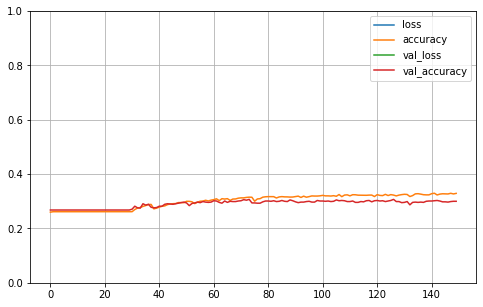

In [40]:
# Model 1

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

Model 1 dengan binary crossentropy, akurasi rendah dan error sangat tinggi

### Build Model 2 - Categorical Crossentropy

In [42]:
# Model 2: 5 output
# Convert to categorical with 4 output

y_train = tf.keras.utils.to_categorical(y_train, 4, dtype="float32")
y_valid = tf.keras.utils.to_categorical(y_valid, 4, dtype="float32")
y_test = tf.keras.utils.to_categorical(y_test, 4, dtype="float32")

In [43]:
print(X_train.shape)
print(y_train.shape)

(8967, 454)
(8967, 4)


In [44]:
# Model 2: Categorical_crossentropy

model2 = tf.keras.models.Sequential()

model2.add(
    tf.keras.layers.Embedding(
        input_dim = MAX_FEATURES,
        output_dim = 32,
        input_length = MAX_LENGTH
    )
)

model2.add(tf.keras.layers.LSTM(units=32, dropout=0.5))

model2.add(tf.keras.layers.Dense(4, activation='softmax'))

In [45]:
model2.compile(optimizer='rmsprop',loss='categorical_crossentropy', metrics=['accuracy'])

model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 454, 32)           16000     
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 132       
Total params: 24,452
Trainable params: 24,452
Non-trainable params: 0
_________________________________________________________________


In [46]:
# history 2
history2 = model2.fit(X_train, y_train, batch_size=256, epochs=150, validation_data=(X_valid, y_valid))

Epoch 1/150
36/36 [==============================] - 9s 143ms/step - loss: 1.3545 - accuracy: 0.3354 - val_loss: 1.2886 - val_accuracy: 0.3821
Epoch 2/150
36/36 [==============================] - 4s 120ms/step - loss: 1.2352 - accuracy: 0.4436 - val_loss: 1.1881 - val_accuracy: 0.5286
Epoch 3/150
36/36 [==============================] - 4s 121ms/step - loss: 1.1529 - accuracy: 0.5338 - val_loss: 1.1365 - val_accuracy: 0.5286
Epoch 4/150
36/36 [==============================] - 4s 122ms/step - loss: 1.0824 - accuracy: 0.5655 - val_loss: 1.0846 - val_accuracy: 0.5617
Epoch 5/150
36/36 [==============================] - 4s 122ms/step - loss: 1.0494 - accuracy: 0.5746 - val_loss: 1.0856 - val_accuracy: 0.5707
Epoch 6/150
36/36 [==============================] - 4s 122ms/step - loss: 1.0251 - accuracy: 0.5887 - val_loss: 1.0774 - val_accuracy: 0.5597
Epoch 7/150
36/36 [==============================] - 4s 122ms/step - loss: 0.9960 - accuracy: 0.6064 - val_loss: 1.1463 - val_accuracy: 0.5527

Epoch 58/150
36/36 [==============================] - 4s 123ms/step - loss: 0.8272 - accuracy: 0.6762 - val_loss: 1.0555 - val_accuracy: 0.5827
Epoch 59/150
36/36 [==============================] - 4s 122ms/step - loss: 0.7991 - accuracy: 0.6937 - val_loss: 1.0532 - val_accuracy: 0.5908
Epoch 60/150
36/36 [==============================] - 4s 121ms/step - loss: 0.7891 - accuracy: 0.6926 - val_loss: 1.0810 - val_accuracy: 0.5858
Epoch 61/150
36/36 [==============================] - 4s 121ms/step - loss: 0.8048 - accuracy: 0.6913 - val_loss: 1.0870 - val_accuracy: 0.5677
Epoch 62/150
36/36 [==============================] - 4s 122ms/step - loss: 0.8026 - accuracy: 0.6925 - val_loss: 1.1028 - val_accuracy: 0.5888
Epoch 63/150
36/36 [==============================] - 4s 121ms/step - loss: 0.7995 - accuracy: 0.6863 - val_loss: 1.0915 - val_accuracy: 0.5938
Epoch 64/150
36/36 [==============================] - 4s 122ms/step - loss: 0.8055 - accuracy: 0.6875 - val_loss: 1.0707 - val_accuracy:

Epoch 115/150
36/36 [==============================] - 4s 122ms/step - loss: 0.7192 - accuracy: 0.7236 - val_loss: 1.1095 - val_accuracy: 0.5958
Epoch 116/150
36/36 [==============================] - 4s 122ms/step - loss: 0.7224 - accuracy: 0.7239 - val_loss: 1.1569 - val_accuracy: 0.6008
Epoch 117/150
36/36 [==============================] - 4s 121ms/step - loss: 0.7290 - accuracy: 0.7186 - val_loss: 1.0993 - val_accuracy: 0.6068
Epoch 118/150
36/36 [==============================] - 4s 122ms/step - loss: 0.7089 - accuracy: 0.7307 - val_loss: 1.1565 - val_accuracy: 0.5878
Epoch 119/150
36/36 [==============================] - 4s 121ms/step - loss: 0.7150 - accuracy: 0.7240 - val_loss: 1.1435 - val_accuracy: 0.5848
Epoch 120/150
36/36 [==============================] - 4s 121ms/step - loss: 0.7207 - accuracy: 0.7207 - val_loss: 1.1342 - val_accuracy: 0.6058
Epoch 121/150
36/36 [==============================] - 4s 122ms/step - loss: 0.7167 - accuracy: 0.7200 - val_loss: 1.1375 - val_ac

## Evaluate Model 2

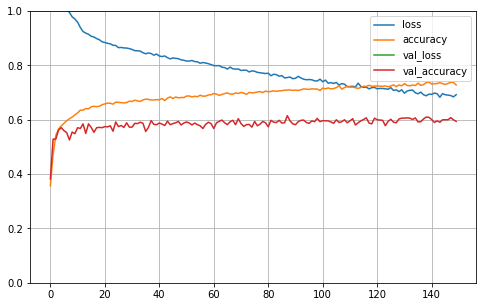

In [48]:
# Model 2

pd.DataFrame(history2.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [111]:
model2.evaluate(X_test, y_test)

35/35 [==============================] - 1s 16ms/step - loss: 1.0607 - accuracy: 0.6164


[1.0606697797775269, 0.6164259910583496]

In [ ]:
class_name = Encoder.classes_.tolist()
class_name

In [71]:
cm

array([[155,  23,  25,  24],
       [ 16, 177,  43,  32],
       [ 21,  52, 261,  51],
       [ 50,  46,  42,  90]], dtype=int64)

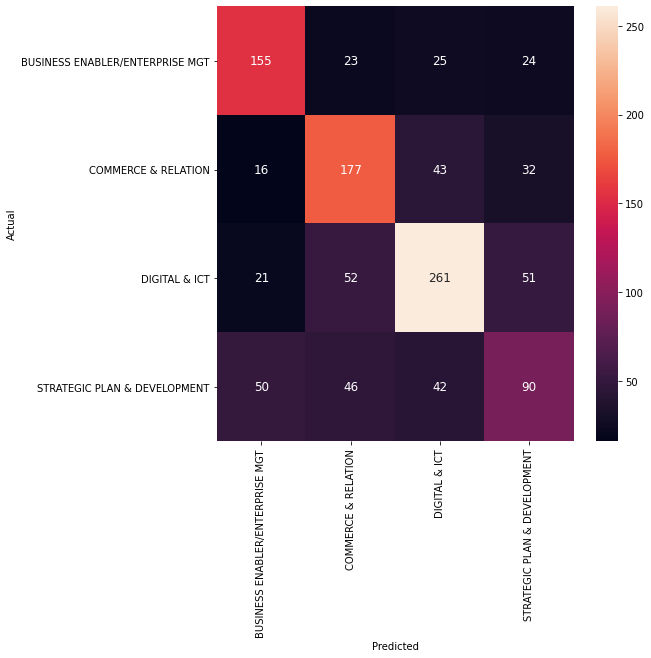

In [110]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

y_pred = model2.predict(X_test)

cm = confusion_matrix(y_test.argmax(axis=1), np.argmax(y_pred, axis=1))
cm = pd.DataFrame(cm, index=class_name, columns=class_name)

plt.subplots(figsize=(8, 8))
sns.heatmap(cm, annot=True, annot_kws={"size": 12}, fmt="d")

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Summary

Model 2 LSTM categorical crossentropy diperoleh akurasi 61% namun tingkat loss pada model masih tinggi dan model tergolong overfit karena validation loss jauh lebih tinggi dari training loss, hal ini bisa disebabkan oleh 
1. Dataset yang kecil (11072 data untuk 4 label) 
2. Data label yang tidak seimbang. Data label dapat disampling agar seimbang, namun dataset menjadi lebih kecil
3. Data deskripsi yang tidak relevan dengan label